**CRISP-DM stages were followed in this study.**

----------------------------

**Section 1. Libraries** 

---------------------------------

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro


----------------------------

**Section 2. Data Understanding** 

---------------------------------

In [78]:
# 2.1 Data Loaded.
ireland_constraction = pd.read_csv('Ireland_Constraction.csv')
spain_constraction = pd.read_csv("Spain_Constraction.csv")
# 2.2. Data Head 
ireland_constraction.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02402V02895,Type of Building and Construction,UNIT,Value (Billion Euros)
0,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,-,All building and construction,Base 2015=100,143.514977
1,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,11,Building (excluding civil engineering),Base 2015=100,182.795802
2,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,111,Residential building,Base 2015=100,279.281551
3,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,112,Non-residential building,Base 2015=100,115.359508
4,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,12,Civil engineering,Base 2015=100,60.438887


In [79]:
# Spain Constraction
spain_constraction.head()

,Year,Value (Billion Euros)
0,2005,300.3
1,2006,345.5
2,2007,348.2
3,2008,305.3
4,2009,259.9


In [80]:
# 2.3 Shape of Ireland Dataset
print("Ireland dataset used in the project {} has rows.".format(ireland_constraction.shape[0]))
print("Ireland dataset used in the project {} has columns.".format(ireland_constraction.shape[1]))

Ireland dataset used in the project 1840 has rows.
Ireland dataset used in the project 8 has columns.


In [81]:
# Shape of Spain
print("Spain dataset used in the project {} has rows.".format(spain_constraction.shape[0]))
print("Spain dataset used in the project {} has columns.".format(spain_constraction.shape[1]))

Spain dataset used in the project 16 has rows.
Spain dataset used in the project 2 has columns.


In [82]:
# 2.6 Missing Value -Ireland 

def missing_values_table(ireland_constraction):
    missing_value = ireland_constraction.isnull().sum()
    missing_val_percent = 100*missing_value/len(ireland_constraction)
    missing_val_table = pd.concat([missing_value, missing_val_percent], axis=1)
    missing_val_table_rename_columns = missing_val_table.rename(columns ={0 :"Missing Value",
                                                                          1 :"% of Total Values"})
    missing_val_table_rename_columns = missing_val_table_rename_columns[missing_val_table_rename_columns.iloc[:,1] != 0].sort_values("% of Total Values",
                                                                                                                                     ascending=False).round(1)
    print ("Your selected dataframe has " + str(ireland_constraction.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_rename_columns.shape[0]) +
              " columns that have missing values.")
    return missing_val_table_rename_columns

print("Missing Value:")
missing_values_table(ireland_constraction)

Missing Value:
Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Value,% of Total Values


In [83]:
# Missing Value -Spain

def missing_values_table(spain_constraction):
    missing_value = spain_constraction.isnull().sum()
    missing_val_percent = 100*missing_value/len(spain_constraction)
    missing_val_table = pd.concat([missing_value, missing_val_percent], axis=1)
    missing_val_table_rename_columns = missing_val_table.rename(columns ={0 :"Missing Value",
                                                                          1 :"% of Total Values"})
    missing_val_table_rename_columns = missing_val_table_rename_columns[missing_val_table_rename_columns.iloc[:,1] != 0].sort_values("% of Total Values",
                                                                                                                                     ascending=False).round(1)
    print ("Your selected dataframe has " + str(spain_constraction.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_rename_columns.shape[0]) +
              " columns that have missing values.")
    return missing_val_table_rename_columns

print("Missing Value:")
missing_values_table(spain_constraction)

Missing Value:
Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Value,% of Total Values


----------------
**Let's explore the Ireland data.**

----------

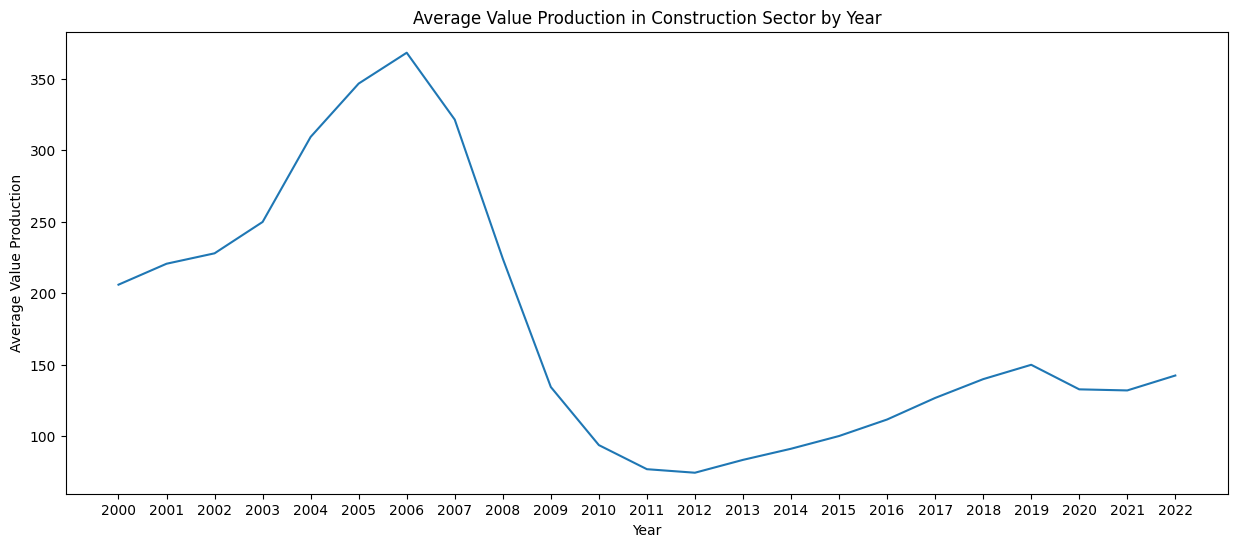

In [84]:
# Check Relationship Between Year-Value 
ireland_constraction['Year'] = ireland_constraction['TLIST(Q1)'].map(lambda x: str(x)[:-1])
yearly_values = ireland_constraction.groupby('Year')['Value (Billion Euros)'].mean()
plt.figure(figsize=(15, 6)) 

plt.plot(yearly_values.index, yearly_values)
plt.xlabel('Year')
plt.ylabel('Average Value Production')
plt.title('Average Value Production in Construction Sector by Year')


plt.show()

In [85]:
# 2.7 Residential and Non-Residential Buildings 

# Filtered Non-Residential - Residential Building
filtered_df = ireland_constraction[ireland_constraction['Type of Building and Construction'].isin(['Residential building', 'Non-residential building'])]

# Residential Building
residential_df = filtered_df[filtered_df['Type of Building and Construction'] == 'Residential building']
residential_df = residential_df[['Quarter', 'Value (Billion Euros)', 'Type of Building and Construction']].copy()

# "VALUE" kolonundaki değerleri stringe dönüştürme
residential_df['Value (Billion Euros)'] = residential_df['Value (Billion Euros)'].astype(str)
residential_df['Value (Billion Euros)'] = residential_df['Value (Billion Euros)'].str.split('.').str[0]
residential_df['Value (Billion Euros)'] = pd.to_numeric(residential_df['Value (Billion Euros)'])
residential_df

,Quarter,Value (Billion Euros),Type of Building and Construction
2,2000Q1,279,Residential building
7,2000Q2,306,Residential building
12,2000Q3,330,Residential building
17,2000Q4,330,Residential building
22,2001Q1,332,Residential building
...,...,...,...
1817,2021Q4,130,Residential building
1822,2022Q1,127,Residential building
1827,2022Q2,120,Residential building
1832,2022Q3,106,Residential building


In [86]:
# Non- Residential Building
non_residential_df  = filtered_df[filtered_df['Type of Building and Construction'] == 'Non-residential building']
non_residential_df  = non_residential_df[['Quarter', 'Value (Billion Euros)', 'Type of Building and Construction']].copy()
non_residential_df['Value (Billion Euros)'] = non_residential_df['Value (Billion Euros)'].astype(str)
non_residential_df['Value (Billion Euros)'] = non_residential_df['Value (Billion Euros)'].str.split('.').str[0]
non_residential_df['Value (Billion Euros)'] = pd.to_numeric(non_residential_df['Value (Billion Euros)'])
non_residential_df

,Quarter,Value (Billion Euros),Type of Building and Construction
3,2000Q1,115,Non-residential building
8,2000Q2,119,Non-residential building
13,2000Q3,124,Non-residential building
18,2000Q4,126,Non-residential building
23,2001Q1,123,Non-residential building
...,...,...,...
1818,2021Q4,146,Non-residential building
1823,2022Q1,144,Non-residential building
1828,2022Q2,139,Non-residential building
1833,2022Q3,139,Non-residential building


In [87]:
# 2.8 Calculate Mean
print("Residential Building Production:",residential_df["Value (Billion Euros)"].mean())
print("NonResidential Building Production:",non_residential_df["Value (Billion Euros)"].mean())

Residential Building Production: 284.01630434782606
NonResidential Building Production: 124.40489130434783


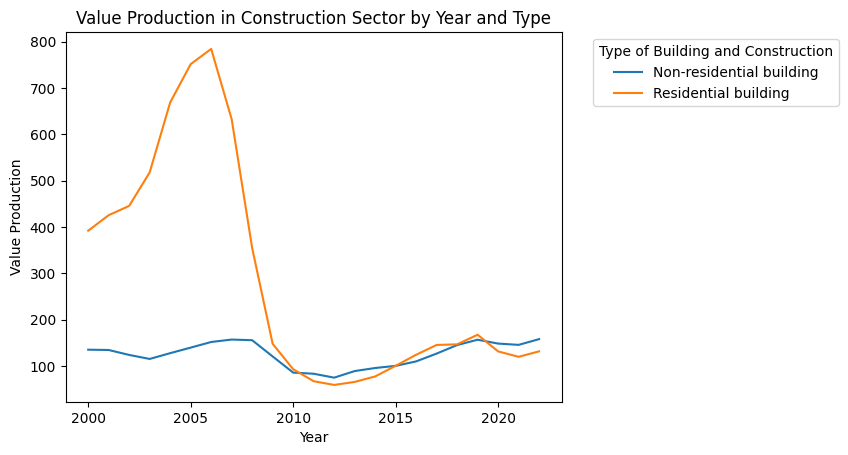

In [88]:
# 2.9 Visualisation Process
ireland_constraction  = ireland_constraction[['Value (Billion Euros)', 'Type of Building and Construction', "Year"]].copy()
ireland_constraction = ireland_constraction[(ireland_constraction["Type of Building and Construction"] == "Non-residential building") | (ireland_constraction["Type of Building and Construction"] == "Residential building")]

year_type_values = ireland_constraction.pivot_table(index='Year', columns='Type of Building and Construction', values='Value (Billion Euros)')

# Drawing value production
year_type_values.plot()
plt.xlabel('Year')
plt.ylabel('Value Production')
plt.title('Value Production in Construction Sector by Year and Type')
plt.legend(title='Type of Building and Construction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

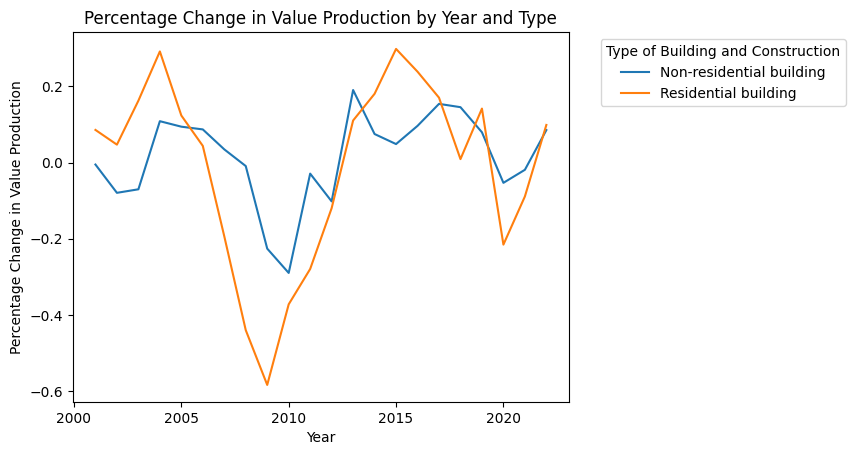

In [89]:
# 2.10 Percentage Change 
year_type_pct_change = year_type_values.pct_change()
year_type_pct_change.plot()
plt.xlabel('Year')
plt.ylabel('Percentage Change in Value Production')
plt.title('Percentage Change in Value Production by Year and Type')
plt.legend(title='Type of Building and Construction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

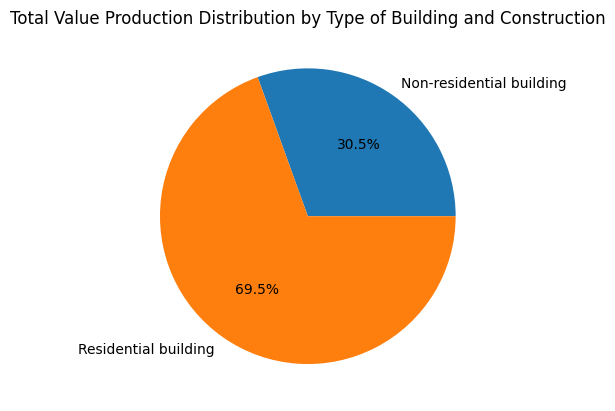

In [90]:
# 2.11 Total Value Generation

total_value_by_type = ireland_constraction.groupby('Type of Building and Construction')['Value (Billion Euros)'].sum()
# Draw the pie chart
plt.pie(total_value_by_type, labels=total_value_by_type.index, autopct='%1.1f%%')
plt.title('Total Value Production Distribution by Type of Building and Construction')
plt.show()

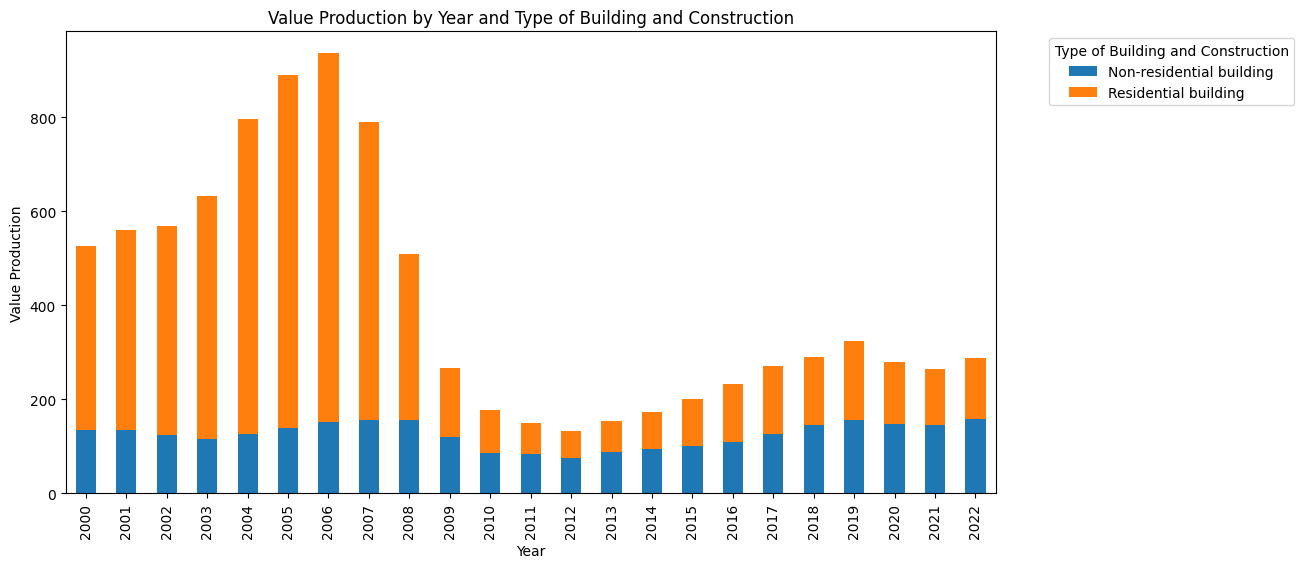

In [91]:
# 2.12 Generation Grouped by Year and Construction Type

grouped_value_by_year = ireland_constraction.pivot_table(index='Year', columns='Type of Building and Construction', values='Value (Billion Euros)')

# Draw the group bar chart
grouped_value_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Value Production')
plt.title('Value Production by Year and Type of Building and Construction')
plt.legend(title='Type of Building and Construction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


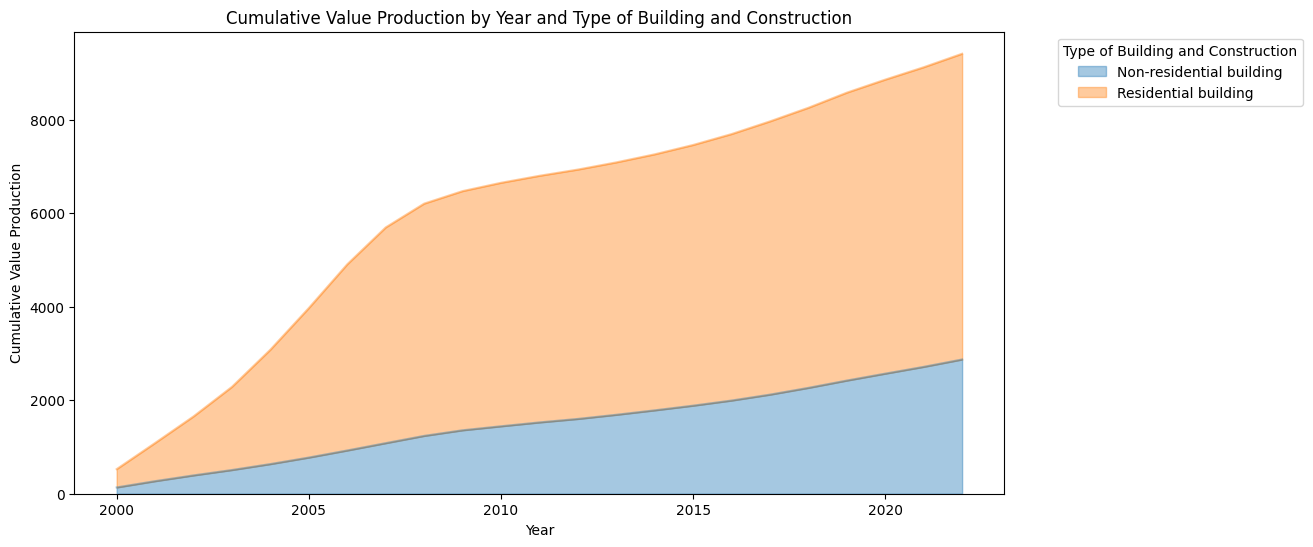

In [92]:
# 2.13 Cumulative Total Value Generation by Year and Construction Type

cumulative_value_by_year = grouped_value_by_year.cumsum()

# plot the area chart
cumulative_value_by_year.plot(kind='area', alpha=0.4, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Cumulative Value Production')
plt.title('Cumulative Value Production by Year and Type of Building and Construction')
plt.legend(title='Type of Building and Construction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


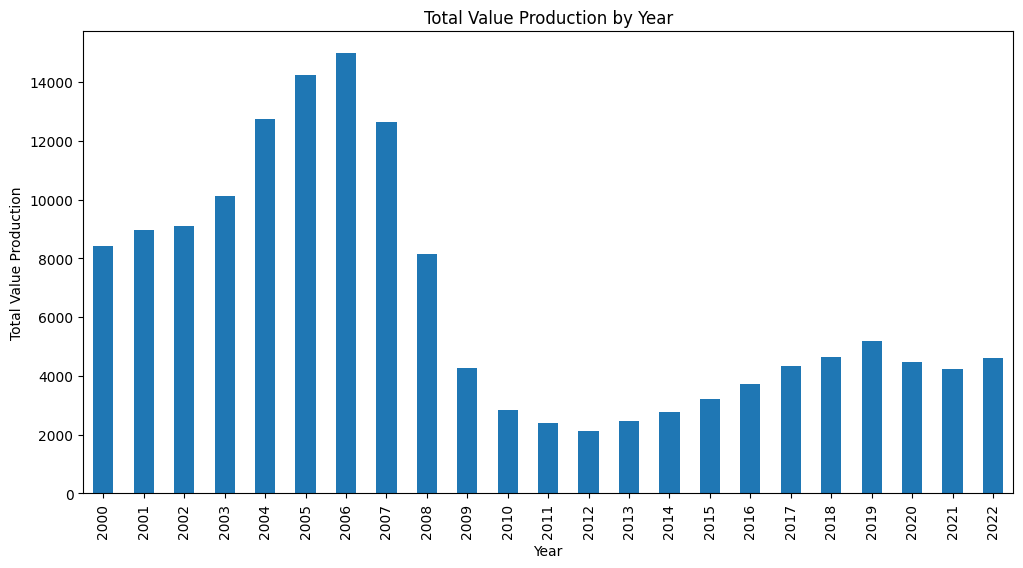

In [93]:
# 2.14 Sum of Value Generation by Year

total_value_by_year = ireland_constraction.groupby('Year')['Value (Billion Euros)'].sum()

# Draw the column chart
total_value_by_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Value Production')
plt.title('Total Value Production by Year')
plt.show()


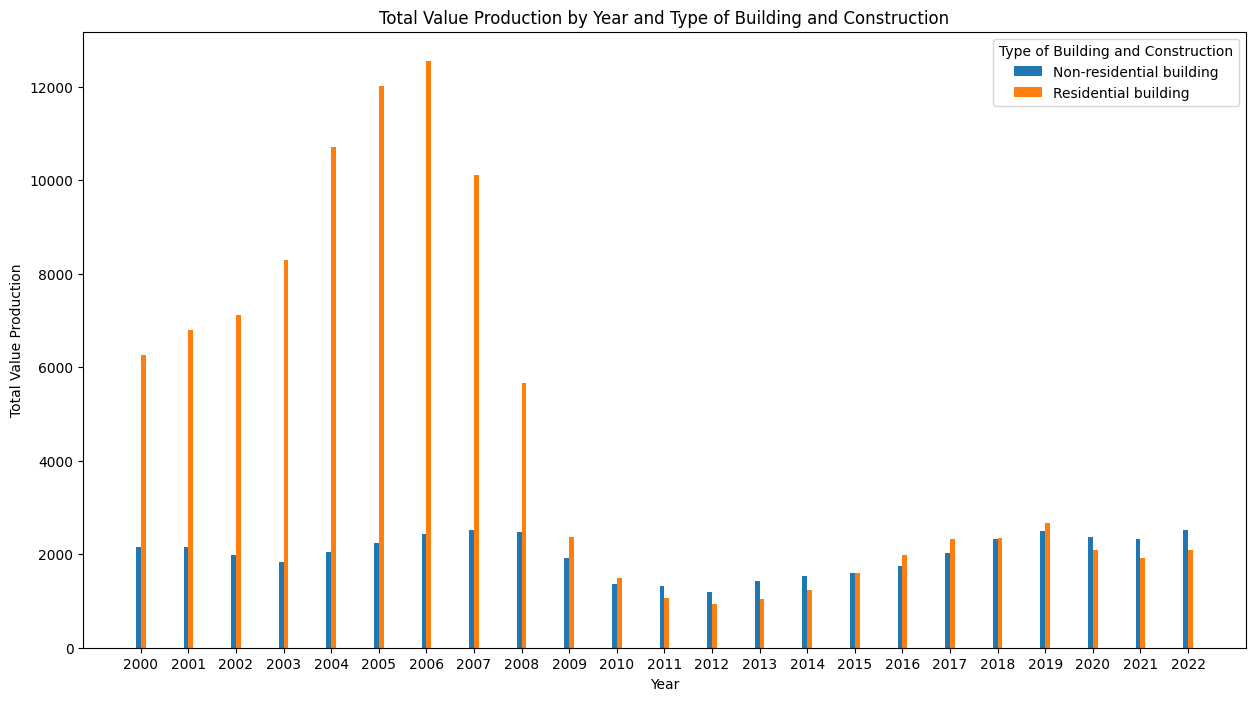

In [94]:
# 2.16 Calculating the sum of value generation by year and type of construction

grouped_data = ireland_constraction.groupby(['Year', 'Type of Building and Construction'])['Value (Billion Euros)'].sum().reset_index()

# İnşaat türlerini ve yılları alma
construction_types = grouped_data['Type of Building and Construction'].unique()
years = grouped_data['Year'].unique()

# Gruplandırılmış sütun grafiğini çizdirin
bar_width = 0.1
fig, ax = plt.subplots(figsize=(15, 8))

for idx, construction_type in enumerate(construction_types):
    values = grouped_data[grouped_data['Type of Building and Construction'] == construction_type]['Value (Billion Euros)']
    ax.bar(np.arange(len(years)) + idx * bar_width, values, width=bar_width, label=construction_type)

ax.set_xticks(np.arange(len(years)) + (len(construction_types) - 1) * bar_width / 2)
ax.set_xticklabels(years)
ax.set_xlabel('Year')
ax.set_ylabel('Total Value Production')
ax.set_title('Total Value Production by Year and Type of Building and Construction')
ax.legend(title='Type of Building and Construction')
plt.show()


----------------
**Let's explore the Spain data.**

----------

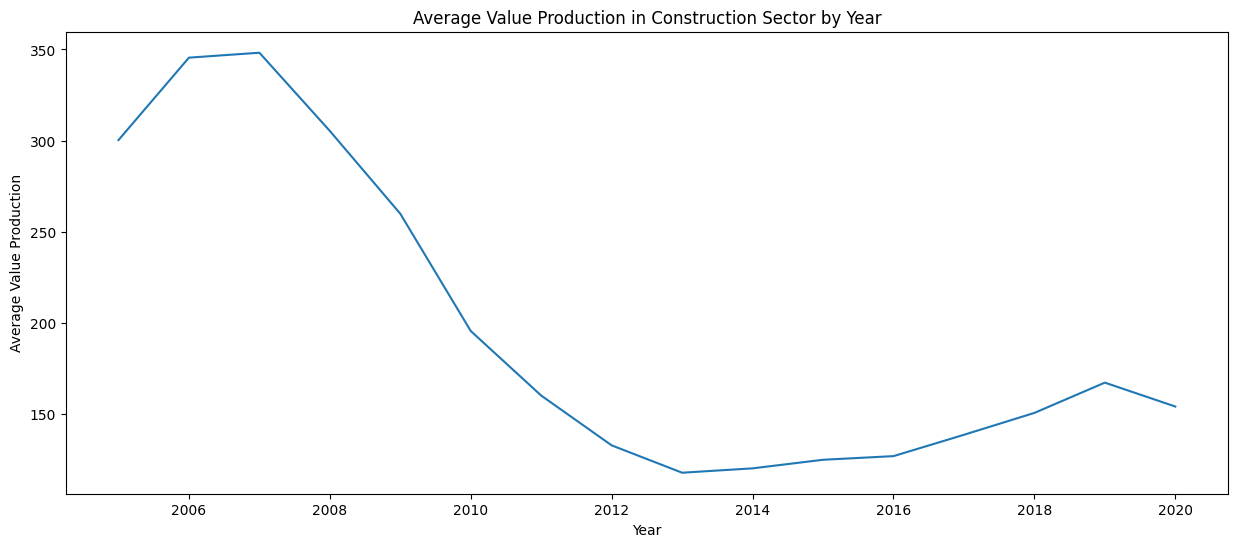

In [95]:
# Check Relationship Between Year-Value 
yearly_values = spain_constraction.groupby('Year')['Value (Billion Euros)'].mean()
plt.figure(figsize=(15, 6)) 

plt.plot(yearly_values.index, yearly_values)
plt.xlabel('Year')
plt.ylabel('Average Value Production')
plt.title('Average Value Production in Construction Sector by Year')


plt.show()

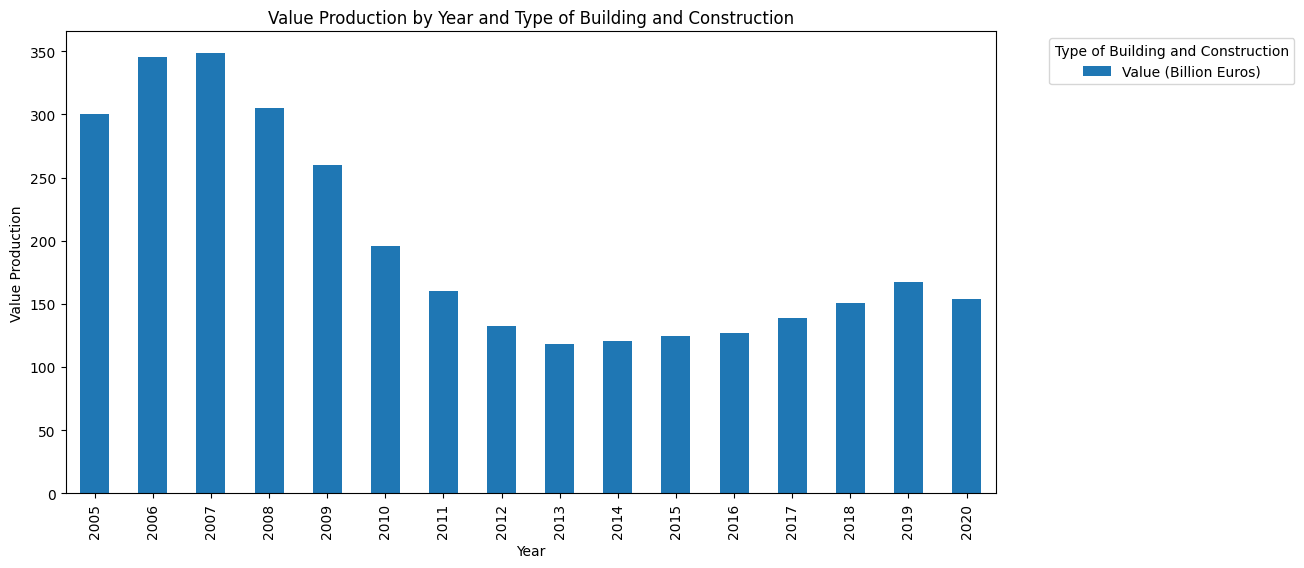

In [96]:
# 2.12 Generation Grouped by Year and Construction Type

grouped_value_by_year = spain_constraction.pivot_table(index='Year', values='Value (Billion Euros)')

# Draw the group bar chart
grouped_value_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Value Production')
plt.title('Value Production by Year and Type of Building and Construction')
plt.legend(title='Type of Building and Construction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


---------------

**Section 3.Statistical analyzes**

-------------------

In [142]:
# Ireland.

average_values = ireland_constraction.groupby('Year')['Value (Billion Euros)'].mean().reset_index()

starting_year = 2005
finishing_year = 2020
ireland_constraction = average_values[(average_values['Year'] >= str(starting_year)) & (average_values['Year'] <= str(finishing_year))]
ireland_constraction.head()

,Year,Value (Billion Euros)
0,2005,445.335339
1,2006,467.857724
2,2007,394.626179
3,2008,254.830620
4,2009,133.901531


In [108]:
spain_constraction.head()

,Year,Value (Billion Euros)
0,2005,300.3
1,2006,345.5
2,2007,348.2
3,2008,305.3
4,2009,259.9


In [144]:
#  Basic Stats
ireland_constraction.describe().T

,count,mean,std,min,25%,50%,75%,max
Value (Billion Euros),16.0,180.61679,135.186269,66.644706,88.331251,134.838215,185.033425,467.857724


In [110]:
spain_constraction.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,16.0,2012.5000,4.760952,2005.0,2008.750,2012.5,2016.25,2020.0
Value (Billion Euros),16.0,196.8125,84.543692,117.9,131.425,157.2,270.00,348.2


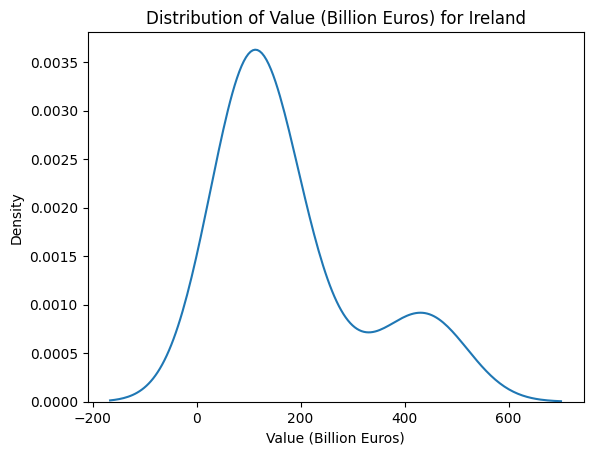

In [111]:
# 3.1. Check Distribution of Datasets -Values Columns 

# For Ireland
values_ireland = ireland_constraction['Value (Billion Euros)']

# Histogram
sns.kdeplot(values_ireland)
plt.xlabel('Value (Billion Euros)')
plt.ylabel('Density')
plt.title('Distribution of Value (Billion Euros) for Ireland')
plt.show()

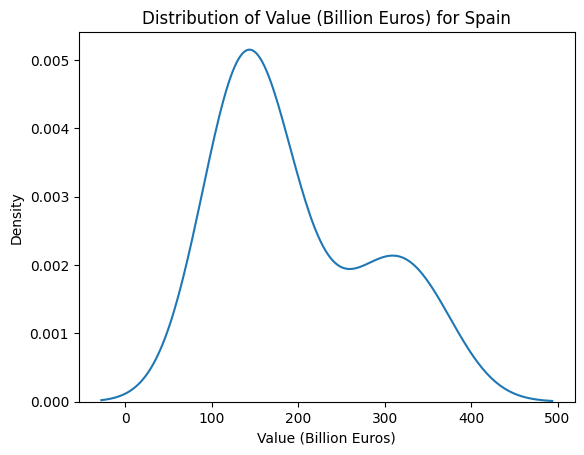

In [117]:
# For Spain
values_spain = spain_constraction['Value (Billion Euros)']

sns.kdeplot(values_spain)
plt.xlabel('Value (Billion Euros)')
plt.ylabel('Density')
plt.title('Distribution of Value (Billion Euros) for Spain')
plt.show()

In [118]:
# 3.2 Shapiro-Wilk Test for Ireland
stat, p_value = shapiro(values_ireland)

alpha = 0.05  
if p_value > alpha:
    result = "The data set fits the normal distribution (H0 cannot be rejected)"
else:
    result = "The data set does not fit the normal distribution (H0 is rejected)"

table = pd.DataFrame({'Test Stats': [stat], 'p-Val': [p_value],
                      'Result': [result]})
print(table)


   Test Stats     p-Val                                             Result
0    0.751838  0.000669  The data set does not fit the normal distribut...


In [119]:
# 3.3. Shapiro-Wilk Test for Spain
stat, p_value = shapiro(values_spain)

alpha = 0.05  
if p_value > alpha:
    result = "The data set fits the normal distribution (H0 cannot be rejected)"
else:
    result = "The data set does not fit the normal distribution (H0 is rejected)"

table = pd.DataFrame({'Test Stats': [stat], 'p-Val': [p_value],
                      'Result': [result]})
print(table)

   Test Stats     p-Val                                             Result
0    0.810538  0.003772  The data set does not fit the normal distribut...


In [120]:
# 3.4. Confidence Interval for Ireland
import scipy.stats as stats

confidence_level = 0.95  # %95 güven düzeyi
sample_size = len(values_ireland)  

# Veri setinin ortalama ve standart sapmasını hesaplayın
mean = values_ireland.mean()
std_dev = values_ireland.std()

# Güven aralığını hesaplayın
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=sample_size-1) * std_dev / (sample_size ** 0.5)
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# Sonucu yazdırın
print("Confidence Level:", confidence_interval)

Confidence Level: (108.58111207216182, 252.65246796502964)


In [121]:
# Confidence Interval for Spain
import scipy.stats as stats

confidence_level = 0.95  # %95 güven düzeyi
sample_size = len(values_spain)  

# Veri setinin ortalama ve standart sapmasını hesaplayın
mean = values_spain.mean()
std_dev = values_spain.std()

# Güven aralığını hesaplayın
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=sample_size-1) * std_dev / (sample_size ** 0.5)
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# Sonucu yazdırın
print("Confidence Level:", confidence_interval)

Confidence Level: (151.76234660122756, 241.86265339877244)


In [123]:
# 3.5 Skewness For Ireland
from scipy.stats import skew
skewness = skew(values_ireland)
skewness

1.2814328911218753

In [124]:
# Skewness For Spain
from scipy.stats import skew
skewness = skew(values_spain)
skewness

0.8016326287202038

In [128]:
# 3.6 Hypothesis Test 

# 1. Mann-Whitney U Test -Values 
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(values_ireland, values_spain)


alpha = 0.05

if p_value < alpha:
     print("We reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are different.")
     print("In Ireland construction expenditures are increasing more steadily and decreasing, while in Spain construction expenditures are more volatile or are changing under the influence of different factors.")
else:
     print("We cannot reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are not different.")

We cannot reject the null hypothesis.
The growth trends in the construction industry between Ireland and Spain are not different.


In [132]:
# 2. Permutation Test

from scipy.stats import permutation_test

observed_difference = np.mean(values_ireland) - np.mean(values_spain)  # Gözlemlenen fark

combined_data = np.concatenate((values_ireland, values_spain))
n1 = len(values_ireland)

permuted_differences = []
num_permutations = 1000  

for _ in range(num_permutations):
    np.random.shuffle(combined_data)
    permuted_set1 = combined_data[:n1]
    permuted_set2 = combined_data[n1:]
    permuted_difference = np.mean(permuted_set1) - np.mean(permuted_set2)  # Farkı hesapla
    permuted_differences.append(permuted_difference)

p_value = (np.abs(permuted_differences) >= np.abs(observed_difference)).mean()

if p_value < alpha:
     print("We reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are different.")
     print("In Ireland construction expenditures are increasing more steadily and decreasing, while in Spain construction expenditures are more volatile or are changing under the influence of different factors.")
else:
     print("We cannot reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are not different.")


We cannot reject the null hypothesis.
The growth trends in the construction industry between Ireland and Spain are not different.


In [135]:
# 3. Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon

alpha = 0.05  
statistic, p_value = wilcoxon(values_ireland, values_spain)

if p_value < alpha:
     print("We reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are different.")
     print("In Ireland construction expenditures are increasing more steadily and decreasing, while in Spain construction expenditures are more volatile or are changing under the influence of different factors.")
else:
     print("We cannot reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are not different.")

We cannot reject the null hypothesis.
The growth trends in the construction industry between Ireland and Spain are not different.


In [136]:
# 4. Wilcoxon Rank-Sum Test
from scipy.stats import ranksums

# Wilcoxon Ranks İşaretli Sıralar Testi'ni uygula
statistic, p_value = wilcoxon(values_ireland, values_spain)

alpha = 0.05  # 

if p_value < alpha:
     print("We reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are different.")
     print("In Ireland construction expenditures are increasing more steadily and decreasing, while in Spain construction expenditures are more volatile or are changing under the influence of different factors.")
else:
     print("We cannot reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are not different.")

We cannot reject the null hypothesis.
The growth trends in the construction industry between Ireland and Spain are not different.


In [138]:
# 5. Independent Samples Median Test 
from scipy.stats import median_test

statistic, p_value, _, _ = median_test(values_ireland, values_spain)

alpha = 0.05

if p_value < alpha:
     print("We reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are different.")
     print("In Ireland construction expenditures are increasing more steadily and decreasing, while in Spain construction expenditures are more volatile or are changing under the influence of different factors.")
else:
     print("We cannot reject the null hypothesis.")
     print("The growth trends in the construction industry between Ireland and Spain are not different.")


We cannot reject the null hypothesis.
The growth trends in the construction industry between Ireland and Spain are not different.
